# Classification with Python for Bank Telemarketing

How do you make business more time-efficient, slash costs and drive up sales? The question is timeless but not rhetorical. In the next few minutes of your reading time, I will apply a few classification algorithms to demonstrate how the use of the data analytic approach can contribute to that end. Together we’ll create a predictive model that will help us customise the client datasets we hand over to the telemarketing team so that they could concentrate resources on more promising clients first.<br>


Please read my thorough description of this code on the website: https://towardsdatascience.com/machine-learning-classification-with-python-for-direct-marketing-2da27906ddac?source=friends_link&sk=2fb033be1773a97ade24416a2da0ebe2

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bank_additional_full_prep.csv', delimiter=';', decimal=',')
df.head()

,age,job,marital,education,housing_loan,personal_loan,contact,contact_month,contact_day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,no


In [3]:
df.shape

(40101, 18)

In [4]:
df.describe()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,40101.000000,40101.000000,40101.000000,40101.000000,40101.000000,40101.000000,40101.000000,40101.000000
mean,40.021845,258.376599,2.566669,0.172489,0.081761,93.574482,-40.507626,3.621110
std,10.420138,259.311511,2.763374,0.494001,1.570292,0.578038,4.628600,1.734151
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,320.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000


In [5]:
from sklearn import preprocessing
num = preprocessing.LabelEncoder()

num.fit(["admin.","blue-collar","entrepreneur","housemaid","management",
         "retired","self-employed","services","student","technician","unemployed","unknown"])
df['job']=num.transform(df['job']).astype('int')

num.fit(["divorced","married","single","unknown"])
df['marital']=num.transform(df['marital']).astype('int')

num.fit(["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course",
         "university.degree","unknown"])
df['education']=num.transform(df['education']).astype('int')

num.fit(["no","yes","unknown"])
df['housing_loan']=num.transform(df['housing_loan']).astype('int')

num.fit(["no","yes","unknown"])
df['personal_loan']=num.transform(df['personal_loan']).astype('int')

num.fit(["failure","nonexistent","success"])
df['poutcome']=num.transform(df['poutcome']).astype('int')

num.fit(["yes","no"])
df['y']=num.transform(df['y']).astype('int')

In [6]:
df.count()

age                    40101
job                    40101
marital                40101
education              40101
housing_loan           40101
personal_loan          40101
contact                40101
contact_month          40101
contact_day_of_week    40101
duration               40101
campaign               40101
previous               40101
poutcome               40101
emp.var.rate           40101
cons.price.idx         40101
cons.conf.idx          40101
euribor3m              40101
y                      40101
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df['cons.price.idx'] = scaler.fit_transform(df[['cons.price.idx']]).reshape(-1,1)
df['cons.conf.idx'] = scaler.fit_transform(df[['cons.conf.idx']]).reshape(-1,1)
df['euribor3m'] = scaler.fit_transform(df[['euribor3m']]).reshape(-1,1)

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing_loan', 'personal_loan', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])
rfc = RandomForestClassifier(n_estimators=40)
rfe = RFE(rfc, 6)
rfe_fit = rfe.fit(X, y)

print("Num Features: %s" % (rfe_fit.n_features_))
print("Selected Features: %s" % (rfe_fit.support_))
print("Feature Ranking: %s" % (rfe_fit.ranking_))

Num Features: 6
Selected Features: [ True  True False  True False False  True False  True  True]
Feature Ranking: [1 1 3 1 2 5 1 4 1 1]


In [9]:
X = np.asarray(df[['age', 'job', 'marital', 'education', 'housing_loan',
                   'emp.var.rate', 'cons.conf.idx', 'euribor3m']])
y = np.asarray(df['y'])

In [10]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(ratio='auto', kind='regular')
X_sampled,y_sampled=sm.fit_sample(X,y)

In [11]:
Sampled_no = len(y_sampled[y_sampled==0])
Sampled_yes = len(y_sampled[y_sampled==1])
print([Sampled_no],[Sampled_yes])

[35584] [35584]


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.3,random_state=0)

In [13]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(C=1, solver='lbfgs')
clf = SVC(kernel='rbf', gamma='auto')
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)

In [14]:
def scorer (i,j,k,l):
    for every in (i,j,k,l):
        every.fit(X_train,y_train)
        print (every.__class__.__name__, 'F1 score =', f1_score(y_test,every.predict(X_test)))

scorer(lr,clf,dtree,rfc)

C:\Users\user-dns\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression F1 score = 0.7199365612463848
SVC F1 score = 0.7576791808873721
DecisionTreeClassifier F1 score = 0.707383672332126
RandomForestClassifier F1 score = 0.9230624794629865


In [15]:
from sklearn.metrics import classification_report

yhat = rfc.predict(X_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     10594
           1       0.93      0.91      0.92     10757

    accuracy                           0.92     21351
   macro avg       0.92      0.92      0.92     21351
weighted avg       0.92      0.92      0.92     21351



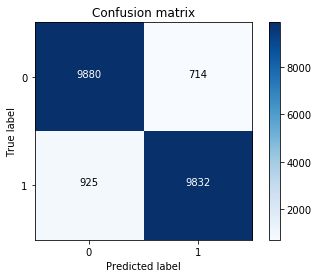

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_matrix(y_test, yhat), classes=['0','1'],normalize= False,  title='Confusion matrix')

Great! We’ve cleaned and transformed the data, selected the most relevant features, elected the best model and made a prediction with a decent score. Now we have a model that should help us customise the client databases we hand over to the telemarketing team so that they could center their efforts on those better positioned to react in the affirmative to the campaign first.


Thank you for reading !!